In [1]:
import numpy as np
import os
from skimage import io
from skimage.color import rgb2lab, lab2rgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

dir_prefix = "/home/ec2-user/SageMaker/"

In [2]:
os.getcwd()

'/home/ec2-user/SageMaker'

['2-2.jpg', 'Style_2.jpeg', '.ipynb_checkpoints', 'style1.jpeg', '2-1.jpg', '8f3810850a33d17a4308d36f3dce786d.jpeg']
2-2.jpg
[[[241 230 198]
  [230 220 184]
  [233 221 181]
  ...
  [193 245 222]
  [195 244 222]
  [196 245 223]]

 [[191 184 155]
  [161 152 119]
  [168 158 122]
  ...
  [164 231 196]
  [162 229 194]
  [160 225 193]]

 [[193 193 167]
  [145 144 114]
  [142 139 106]
  ...
  [144 216 176]
  [153 225 185]
  [159 230 190]]

 ...

 [[232 207 166]
  [218 191 144]
  [213 185 135]
  ...
  [203 242 197]
  [206 242 198]
  [208 241 198]]

 [[234 206 166]
  [219 192 145]
  [217 189 139]
  ...
  [204 243 198]
  [206 242 198]
  [209 242 199]]

 [[226 198 158]
  [215 188 141]
  [219 191 141]
  ...
  [204 243 198]
  [207 243 199]
  [209 242 199]]]


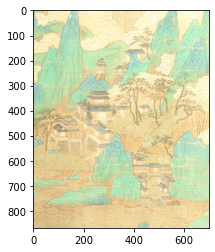

Style_2.jpeg
[[[190 141  72]
  [197 148  79]
  [200 151  82]
  ...
  [ 94 173 186]
  [ 99 175 189]
  [103 179 195]]

 [[204 155  86]
  [194 145  76]
  [185 136  67]
  ...
  [ 84 164 175]
  [ 92 168 182]
  [ 99 175 191]]

 [[205 156  87]
  [195 146  77]
  [187 138  69]
  ...
  [ 80 160 171]
  [ 87 165 178]
  [ 96 172 186]]

 ...

 [[231 228 173]
  [202 195 140]
  [188 175 120]
  ...
  [194 177  99]
  [192 175  97]
  [190 173  95]]

 [[233 230 175]
  [204 197 142]
  [190 177 122]
  ...
  [198 180 104]
  [199 181 105]
  [199 181 105]]

 [[233 230 175]
  [205 198 143]
  [191 178 123]
  ...
  [200 182 108]
  [204 186 112]
  [205 187 113]]]


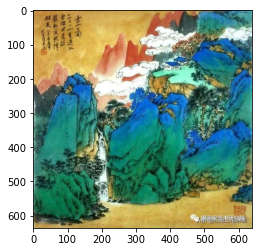

.ipynb_checkpoints
style1.jpeg
[[[168 174 170]
  [165 171 169]
  [160 166 166]
  ...
  [160 167 175]
  [164 169 175]
  [172 175 180]]

 [[206 215 210]
  [205 211 209]
  [202 208 208]
  ...
  [180 191 197]
  [184 191 197]
  [192 195 202]]

 [[242 253 249]
  [243 252 251]
  [242 247 250]
  ...
  [210 223 229]
  [212 223 229]
  [215 222 232]]

 ...

 [[208 212 211]
  [212 214 213]
  [213 215 214]
  ...
  [221 228 238]
  [235 238 247]
  [233 231 242]]

 [[206 210 209]
  [210 212 211]
  [211 213 212]
  ...
  [229 236 246]
  [243 245 255]
  [239 239 251]]

 [[223 225 224]
  [225 227 226]
  [226 228 227]
  ...
  [228 235 243]
  [244 244 254]
  [239 236 247]]]


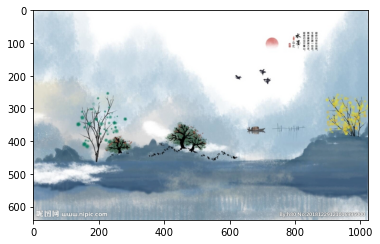

2-1.jpg
[[[236 234 222]
  [236 234 222]
  [236 234 222]
  ...
  [238 235 220]
  [235 233 218]
  [237 235 222]]

 [[236 234 222]
  [236 234 222]
  [236 234 222]
  ...
  [238 235 220]
  [235 233 218]
  [237 235 222]]

 [[236 234 222]
  [236 234 222]
  [236 234 222]
  ...
  [238 235 220]
  [235 233 218]
  [237 235 222]]

 ...

 [[242 232 222]
  [242 232 222]
  [242 232 222]
  ...
  [240 232 219]
  [239 231 218]
  [241 233 222]]

 [[242 232 222]
  [242 232 222]
  [242 232 222]
  ...
  [240 232 219]
  [239 231 218]
  [241 233 222]]

 [[242 232 222]
  [242 232 222]
  [242 232 222]
  ...
  [241 233 220]
  [239 231 218]
  [241 233 222]]]


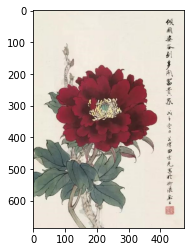

8f3810850a33d17a4308d36f3dce786d.jpeg
[[[195 191 188]
  [195 191 188]
  [194 190 187]
  ...
  [150 147 142]
  [151 148 143]
  [152 149 144]]

 [[194 190 187]
  [194 190 187]
  [194 190 187]
  ...
  [153 150 145]
  [154 151 146]
  [155 152 147]]

 [[192 188 185]
  [193 189 186]
  [193 189 186]
  ...
  [150 147 142]
  [150 147 142]
  [151 148 143]]

 ...

 [[198 198 196]
  [198 198 196]
  [199 199 197]
  ...
  [157 159 148]
  [157 159 148]
  [157 159 148]]

 [[197 197 195]
  [197 197 195]
  [198 198 196]
  ...
  [157 159 148]
  [157 159 148]
  [157 159 148]]

 [[192 193 188]
  [195 196 191]
  [198 199 194]
  ...
  [156 158 144]
  [156 158 144]
  [156 158 144]]]


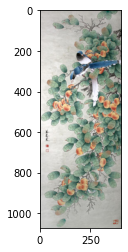

In [3]:
data_dir = dir_prefix + "InkPainting/"
print(os.listdir(data_dir))
for file in os.listdir(data_dir):
    print(file)
    if(file=='.ipynb_checkpoints'):
        continue
    img = io.imread(os.path.join(data_dir, file))
    print(img)
    plt.imshow(img)
    plt.show()

In [4]:
# read style image, X -> Y
# X: Store grayscale values in 3*3 pixel cells
# Y: Store the color value of the center pixel cell
def load_StyleImage(file_name, size=1):
    # io.imread: read picture and save as rgb 
    img = io.imread(file_name)
    plt.imshow(img)
    plt.show()
    # rgb2lab: rgb transfer to lab
    img = rgb2lab(img)
    # picture's width and height
    h = img.shape[0]
    w = img.shape[1]
    # print(img)
    X = []  # light
    Y = []  # color
    # enum every center point
    for x in range(size, h - size):
        for y in range(size, w - size):
            # grid light
            grid = img[x - size : x + size + 1, y - size : y + size + 1, 0]
            X.append(grid.reshape(-1))
            # center color
            Y.append(img[x, y, 1:])
#     print(X)
#     print(Y)
    print("loading " + file_name+" done.")
    return X, Y

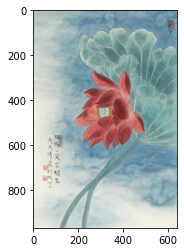

loading /home/ec2-user/SageMaker/Style_3.jpg done.


In [5]:
# Style image direction
style_img = dir_prefix + "Style_3.jpg"

# Read style images and construct KNN mapping dataset
X, Y = load_StyleImage(style_img)

reading img
loading 2-2.jpg


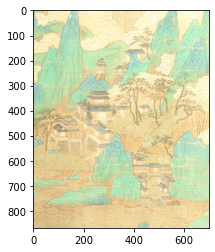

loading /home/ec2-user/SageMaker/InkPainting/2-2.jpg done.
loading Style_2.jpeg


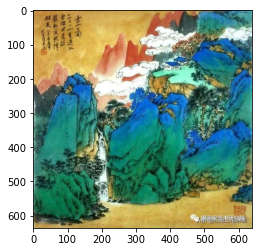

loading /home/ec2-user/SageMaker/InkPainting/Style_2.jpeg done.
loading style1.jpeg


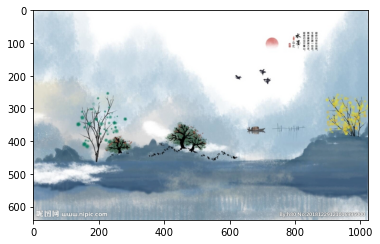

loading /home/ec2-user/SageMaker/InkPainting/style1.jpeg done.
loading 2-1.jpg


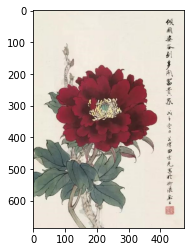

loading /home/ec2-user/SageMaker/InkPainting/2-1.jpg done.
loading 8f3810850a33d17a4308d36f3dce786d.jpeg


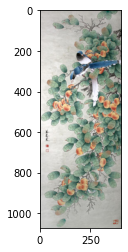

loading /home/ec2-user/SageMaker/InkPainting/8f3810850a33d17a4308d36f3dce786d.jpeg done.
finish reading


In [6]:
style_img_dir = dir_prefix + "InkPainting/"
def create_ImgSet(img_dir=style_img_dir, number=2):
    X = []
    Y = []
    n = 0
    for file in os.listdir(img_dir):
        if(file=='.ipynb_checkpoints'):
            continue
        print("loading", file)
        path = os.path.join(img_dir, file)
        perX, perY = load_StyleImage(path)
        X.extend(perX)
        Y.extend(perY)
        n += 1
        if n >= number:
            break
    return X, Y


print("reading img")
X, Y = create_ImgSet(number=5)
print("finish reading")

A kNN model is established and k=4 is set. The predicted color value is a weighted average of the color values of the four points closest to it, and its weight is proportional to the inverse of the distance.

In [7]:
# knn reg fit
knnreg = KNeighborsRegressor(n_neighbors=3, weights='distance')

print("start knn fitting")
print(np.array(Y).shape)
# Construction of kNN model with X and Y
knnreg.fit(X, Y)

print("finish knn fitting")

start knn fitting
(2414337, 2)
finish knn fitting


In [8]:
# linear reg fit
linearreg = LinearRegression()
# Y = np.array(Y)
print("start linear reg fitting")
linearreg.fit(X, Y)
print("finish linear reg fitting")

start linear reg fitting
finish linear reg fitting


Process the content images to obtain a number of $3 \times 3$ grayscale matrices.

In [9]:
def split_image(img, size=1):
    h, w = img.shape[:2]
    X = []
    for x in range(size, h - size):
        for y in range(size, w - size):
            X.append(img[x - size : x + size + 1, y - size : y + size + 1, 0].reshape(-1))
    return X

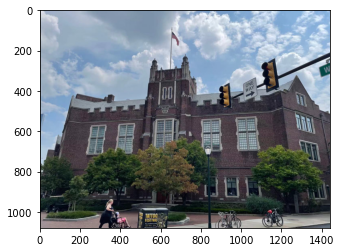

(1080, 1440, 3)
start predicting
(1550164, 2)
finish predicting


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


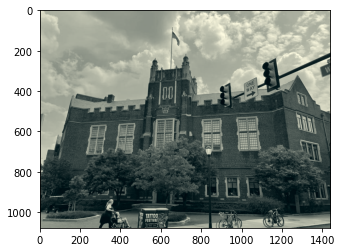

(1078, 1438, 3)


In [10]:
# Input content image and output transfered image according to the already established linear model.
def linearrebuild(file_name, size=1):
    img = io.imread(file_name)
    plt.imshow(img)
    plt.show()
    print(img.shape)
    
    img = rgb2lab(img)
    h, w = img.shape[:2]
    
    # Initialize the tensor corresponding to the output image
    out = np.zeros([h, w, 3])
    
    # get every 3*3 grayscale matrix of the content image
    X = split_image(img)
    
    print("start predicting")
    # find the regression values of a series of 3*3 grayscale matrices X of the input
    # reshape the output color value to the corresponding dimension of the image
    pred = linearreg.predict(X)
    print(pred.shape)
    pred = pred.reshape(h - 2 * size, w - 2 * size, -1)
    print("finish predicting")
    
    for x in range(size, h - size):
        for y in range(size, w - size):
            out[x, y, 0] = img[x, y, 0]
            
            # The values of the last two channels, p_ab, start from 0, so the coordinates need to be shifted 1 pixel up to the left
            out[x, y, 1] = pred[x - size, y - size, 0]
            out[x, y, 2] = pred[x - size, y - size, 1]
    
    out = out[size : h - size, size : w - size, :]
    return out

# content image direction
input_path = dir_prefix + "input_1.jpg"

# generate image
new_photo = linearrebuild(input_path)

# output image direction
output_path = "linearoutput.jpg"

# save the image
io.imsave(output_path, lab2rgb(new_photo))

# print the image
plt.imshow(lab2rgb(new_photo))
plt.show()
print(new_photo.shape)

obtain the image after color style migration according to kNN algorithm

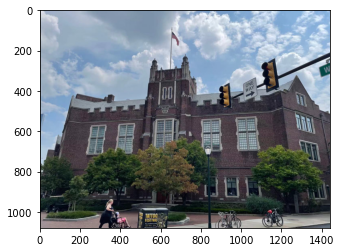

(1080, 1440, 3)
start predicting
(1550164, 2)
finish predicting


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


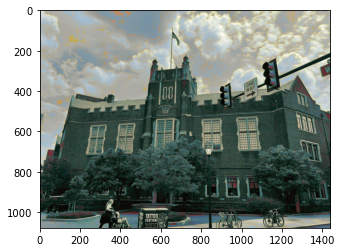

(1078, 1438, 3)


In [11]:
# Input content image and output transfered image according to the already established kNN model.
def rebuild(file_name, size=1):
    img = io.imread(file_name)
    plt.imshow(img)
    plt.show()
    print(img.shape)
    
    img = rgb2lab(img)
    h, w = img.shape[:2]
    
    # Initialize the tensor corresponding to the output image
    out = np.zeros([h, w, 3])
    
    # get every 3*3 grayscale matrix of the content image
    X = split_image(img)
    
    print("start predicting")
    # find the regression values of a series of 3*3 grayscale matrices X of the input
    # reshape the output color value to the corresponding dimension of the image
    pred = knnreg.predict(X)
    print(pred.shape)
    pred = pred.reshape(h - 2 * size, w - 2 * size, -1)
    print("finish predicting")
    
    for x in range(size, h - size):
        for y in range(size, w - size):
            out[x, y, 0] = img[x, y, 0]
            
            # The values of the last two channels, p_ab, start from 0, so the coordinates need to be shifted 1 pixel up to the left
            out[x, y, 1] = pred[x - size, y - size, 0]
            out[x, y, 2] = pred[x - size, y - size, 1]
    
    out = out[size : h - size, size : w - size, :]
    return out

# content image direction
input_path = dir_prefix + "input_1.jpg"

# generate image
new_photo = rebuild(input_path)

# output image direction
output_path = "knnoutput.jpg"

# save the image
io.imsave(output_path, lab2rgb(new_photo))

# print the image
plt.imshow(lab2rgb(new_photo))
plt.show()
print(new_photo.shape)